In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)
import pandas as pd

df=pd.read_csv('D:\\_NILESH\\dissertation\\data\\cme.csv')

In [2]:
df.head()

,Date,Time,Central_PA,Width,Linear_Speed,2nd_order_speed_initial,2nd_order_speed_final,20R_speed,Accel,Mass,Kinetic_Energy,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3


In [4]:
import numpy as np
# Re-import the data
cme_data = df

# Convert the 'Date' column to a datetime object
cme_data['Date'] = pd.to_datetime(cme_data['Date'], errors='coerce')

# Check for placeholder values (9999) and treat them as NaN
cme_data.replace(9999, np.nan, inplace=True)

# Impute missing values using forward-fill method for time series data
cme_data.fillna(method='ffill', inplace=True)

# Display the first few rows of the cleaned data
cme_data.head()

,Date,Time,Central_PA,Width,Linear_Speed,2nd_order_speed_initial,2nd_order_speed_final,20R_speed,Accel,Mass,Kinetic_Energy,MPA,Remarks
0,1996-01-11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996-01-13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996-01-15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996-01-22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996-01-26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3


In [5]:
# Rename columns to more user-friendly names
renamed_columns = {
    'Accel': 'Acceleration',
    'Width': 'CME_Width',
    'Linear_Speed': 'Linear_Speed'
}
cme_data.rename(columns=renamed_columns, inplace=True)

# Set the 'Date' column as the index for the dataframe
cme_data.set_index('Date', inplace=True)

# Resample the data to months
monthly_cme_data = cme_data.resample('M').mean()

# Display the first few rows of the resampled data
monthly_cme_data.head()

,CME_Width,MPA
Date,,
1996-01-31,31.333333,212.500000
1996-02-29,52.333333,146.166667
1996-03-31,32.500000,149.555556
1996-04-30,55.111111,212.500000
1996-05-31,57.714286,150.285714


In [7]:
# Ensure the columns are retained from the original cleaned data
subset_cme_data_original = cme_data[renamed_columns.values()]

# Resample the subset data to months
subset_cme_data_monthly = subset_cme_data_original.resample('M').mean()

# Display the first few rows of the resampled subset data
subset_cme_data_monthly.head()


,CME_Width
Date,
1996-01-31,31.333333
1996-02-29,52.333333
1996-03-31,32.500000
1996-04-30,55.111111
1996-05-31,57.714286


In [8]:
# Check the 'Acceleration' and 'Linear_Speed' columns in the original cleaned data
subset_cme_data_original[['Acceleration', 'Linear_Speed']].describe()


,Acceleration,Linear_Speed
count,33740,33740
unique,3670,1455
top,------,----
freq,486,114


In [17]:
# Convert placeholders to NaN
subset_cme_data_original['Acceleration'].replace('------', np.nan, inplace=True)
subset_cme_data_original['Linear_Speed'].replace('----', np.nan, inplace=True)

# Convert columns to numeric data types
subset_cme_data_original['Acceleration'] = pd.to_numeric(subset_cme_data_original['Acceleration'], errors='coerce')
subset_cme_data_original['Linear_Speed'] = pd.to_numeric(subset_cme_data_original['Linear_Speed'], errors='coerce')

# Impute missing values using forward-fill method
subset_cme_data_original.fillna(method='ffill', inplace=True)
subset_cme_data_original.to_csv('D:\\_NILESH\\dissertation\\data\\cleaned\\cme.csv')
# Resample the data to months
subset_cme_data_resampled = subset_cme_data_original.resample('M').mean()

# Display the first few rows of the resampled data
subset_cme_data_resampled.head()

,Acceleration,CME_Width,Linear_Speed
Date,,,
1996-01-31,-31.100000,31.333333,333.500000
1996-02-29,-31.100000,52.333333,234.000000
1996-03-31,-31.100000,32.500000,152.166667
1996-04-30,-31.100000,55.111111,184.166667
1996-05-31,0.614286,57.714286,302.000000


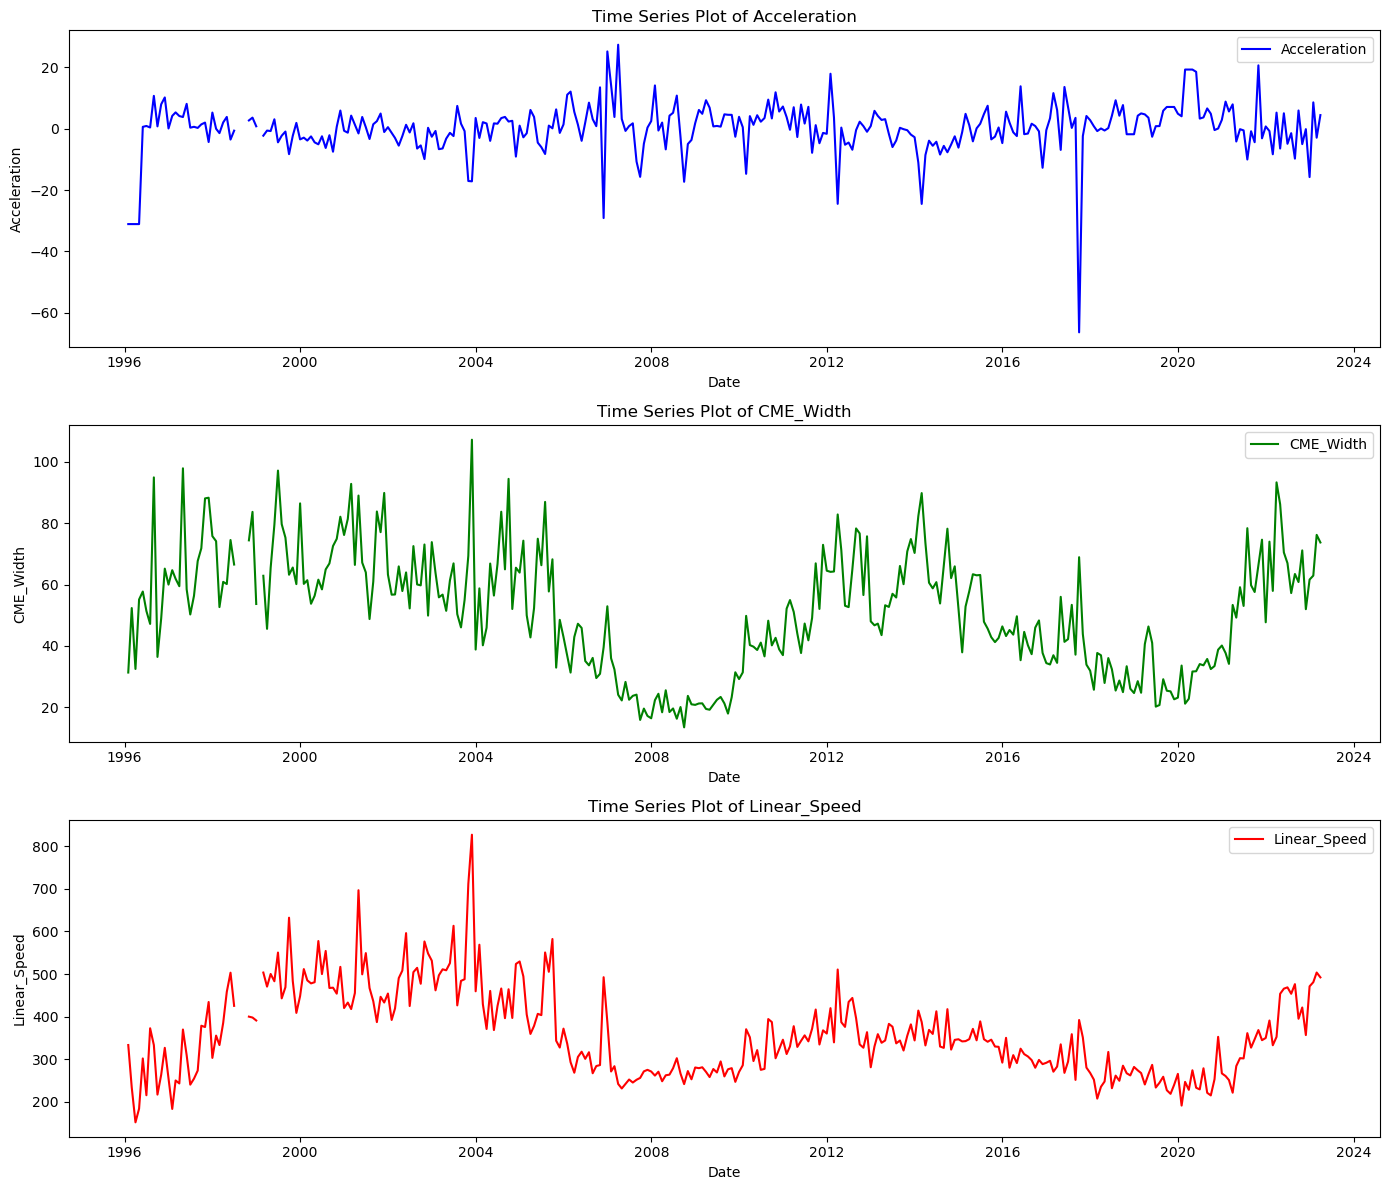

In [14]:
# Generate Time Series Plots for the specified columns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Plot for Acceleration
axes[0].plot(subset_cme_data_resampled.index, subset_cme_data_resampled['Acceleration'], color='blue', label='Acceleration')
axes[0].set_title('Time Series Plot of Acceleration')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Acceleration')
axes[0].legend()

# Plot for CME_Width
axes[1].plot(subset_cme_data_resampled.index, subset_cme_data_resampled['CME_Width'], color='green', label='CME_Width')
axes[1].set_title('Time Series Plot of CME_Width')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('CME_Width')
axes[1].legend()

# Plot for Linear_Speed
axes[2].plot(subset_cme_data_resampled.index, subset_cme_data_resampled['Linear_Speed'], color='red', label='Linear_Speed')
axes[2].set_title('Time Series Plot of Linear_Speed')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Linear_Speed')
axes[2].legend()

plt.tight_layout()
# plt.savefig("time_series_plots_resampled.png", format='png')
plt.show()

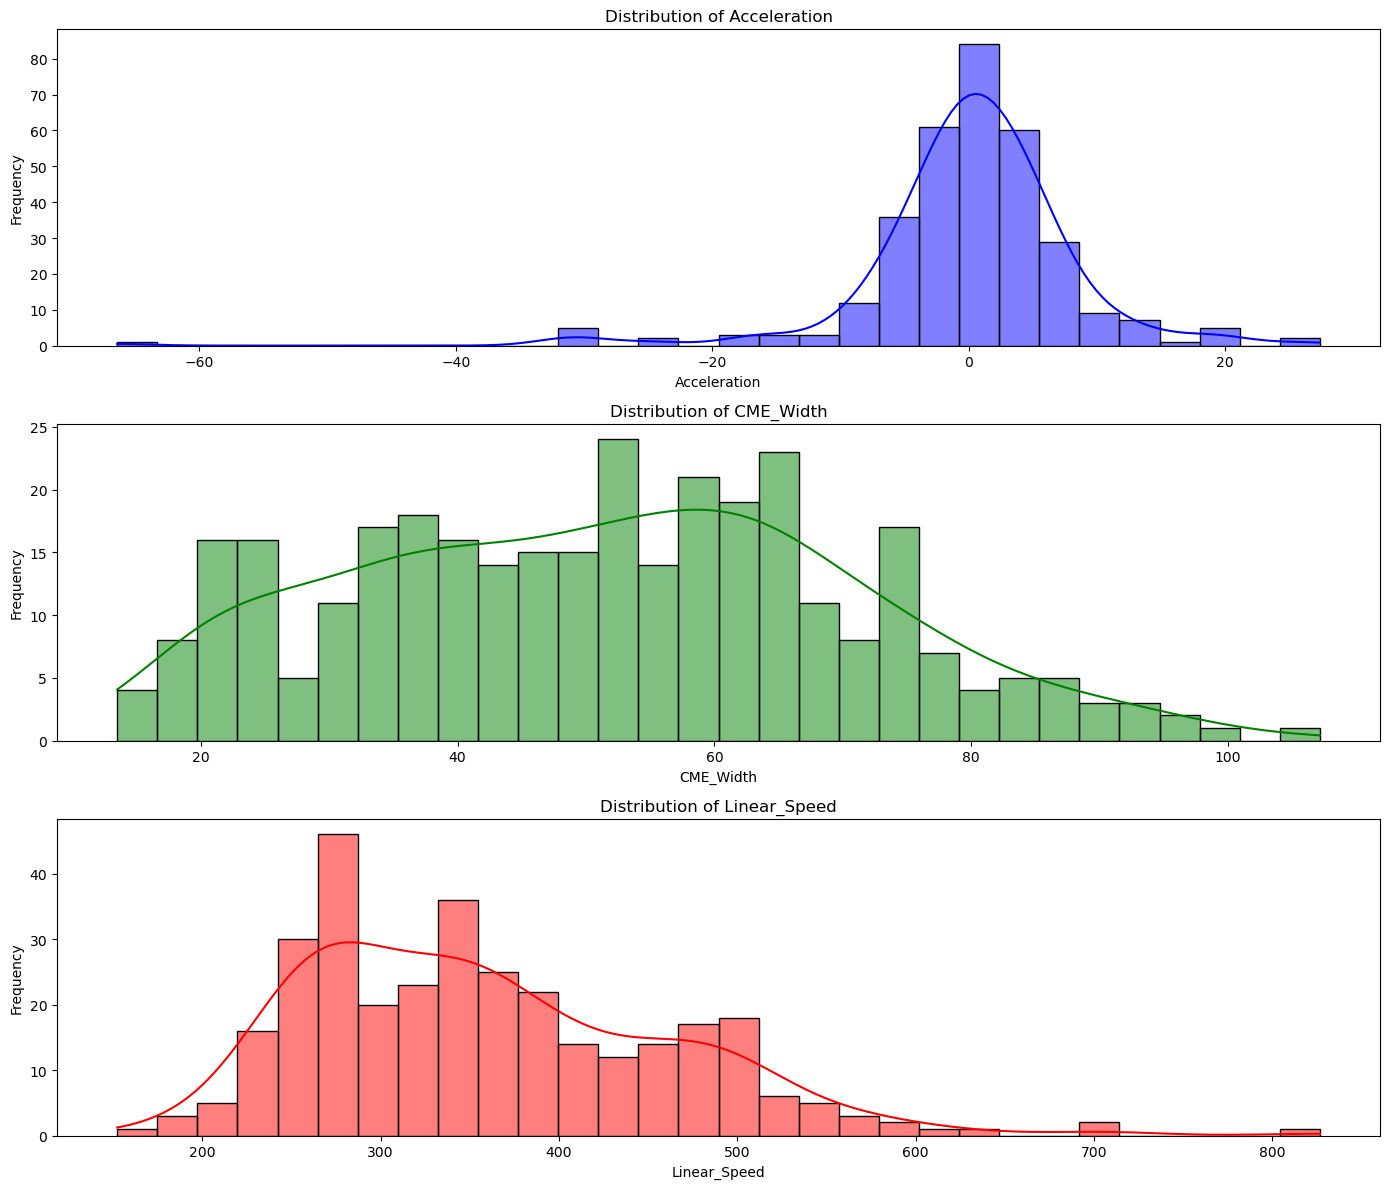

In [15]:
import seaborn as sns

# Generate Distribution Plots for the specified columns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Distribution plot for Acceleration
sns.histplot(subset_cme_data_resampled['Acceleration'], ax=axes[0], color='blue', bins=30, kde=True)
axes[0].set_title('Distribution of Acceleration')
axes[0].set_xlabel('Acceleration')
axes[0].set_ylabel('Frequency')

# Distribution plot for CME_Width
sns.histplot(subset_cme_data_resampled['CME_Width'], ax=axes[1], color='green', bins=30, kde=True)
axes[1].set_title('Distribution of CME_Width')
axes[1].set_xlabel('CME_Width')
axes[1].set_ylabel('Frequency')

# Distribution plot for Linear_Speed
sns.histplot(subset_cme_data_resampled['Linear_Speed'], ax=axes[2], color='red', bins=30, kde=True)
axes[2].set_title('Distribution of Linear_Speed')
axes[2].set_xlabel('Linear_Speed')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
# plt.savefig("/mnt/data/distribution_plots_resampled.png", format='png')
plt.show()


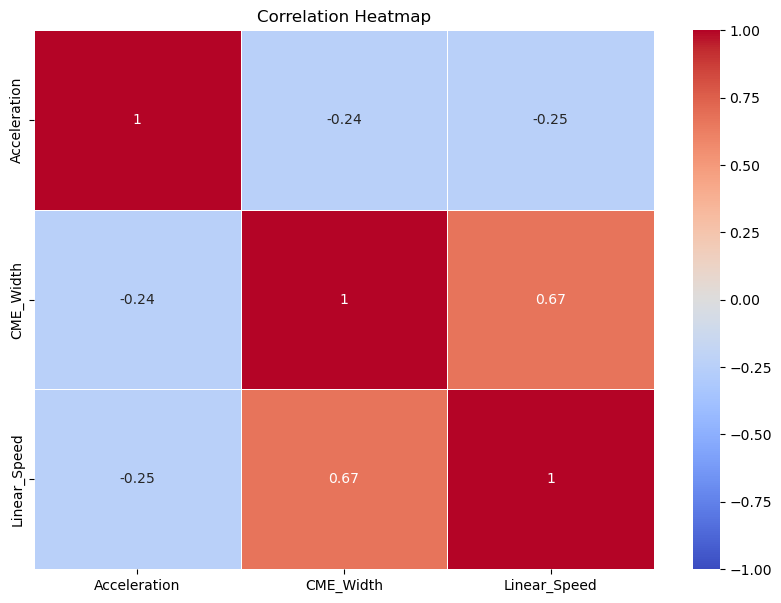

In [16]:
# Generate Correlation Heatmap for the specified columns

# Compute the correlation matrix
correlation_matrix = subset_cme_data_resampled.corr()

# Generate the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
# plt.savefig("/mnt/data/correlation_heatmap_resampled.png", format='png')
plt.show()